In [1]:
import os
path = os.path.abspath(os.path.join('..','..'))
import sys
sys.path.append(path)
from reservoirpy.pvtpy import black_oil as bo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


/home/santiago/Documents/dev/reservoirpy/reservoirpy/pvtpy/black_oil/pvt.py:334: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(pressure,(list,np.ndarray,type(None)))


In [2]:
s = 20000
p = 5000
t = 200
rsw = 17.8
p_range = np.linspace(1000,5000,10)

In [3]:
bo.rsw(p=p,t=t,s=s,method=['culberson','mccoy'])

,rws_culberson,rsw_mccoy
pressure,,
5000,20.025272,17.728061


In [4]:
bo.bw(p=p_range,t=t,s=s,method=['mccain','mccoy'])

,bw_mccain,bw_mccoy
pressure,,
1000.000000,1.039063,1.000346
1444.444444,1.039100,1.000382
1888.888889,1.039137,1.000418
2333.333333,1.039175,1.000454
2777.777778,1.039212,1.000490
3222.222222,1.039249,1.000526
3666.666667,1.039287,1.000561
4111.111111,1.039324,1.000597
4555.555556,1.039361,1.000633


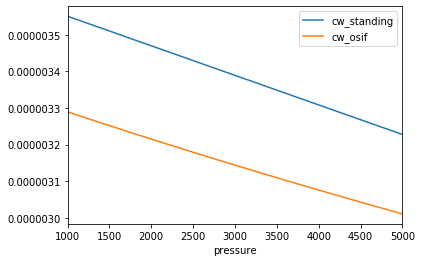

In [5]:
bo.cw(p=p_range,t=t,s=s,rsw=rsw,method=['standing','osif']).plot()

In [6]:
bo.muw(p=p_range,t=t,s=s,method=['russel', 'van_wingen'])

,muw_van_wingen,muw_russel
pressure,,
1000.000000,0.312797,0.327142
1444.444444,0.312797,0.327341
1888.888889,0.312797,0.327612
2333.333333,0.312797,0.327956
2777.777778,0.312797,0.328372
3222.222222,0.312797,0.328860
3666.666667,0.312797,0.329421
4111.111111,0.312797,0.330054
4555.555556,0.312797,0.330759


In [7]:
pd.MultiIndex.from_arrays([p_range, np.full(p_range.shape,t)], names=('number', 'color'))

MultiIndex([(            1000.0, 200),
            (1444.4444444444443, 200),
            ( 1888.888888888889, 200),
            (2333.3333333333335, 200),
            ( 2777.777777777778, 200),
            ( 3222.222222222222, 200),
            ( 3666.666666666667, 200),
            ( 4111.111111111111, 200),
            ( 4555.555555555556, 200),
            (            5000.0, 200)],
           names=['number', 'color'])

In [8]:
bo.rhow(p=p, s=s)

,rhow
pressure,
5000,63.26736


In [9]:
#c1 = component(name='methane', symbol='C1H4', mw=16.043, ppc=666, tpc=-116)

In [10]:
x=bo.chromatography({'mole_fraction':[0.75,0.1,0.58,0.07]}, index=['methane', 'ethane', 'propane','isobutane'])

enter Join


In [13]:
x

,mole_fraction,formula,mw,ppc,tpc
methane,0.500000,CH4,16.043,666.4,-116.67
ethane,0.066667,C2H6,30.070,706.5,89.92
propane,0.386667,C3H8,44.097,616.0,206.06
isobutane,0.046667,C4H10,58.123,527.9,274.46


In [12]:
bo.properties_df.merge(x, how='inner', right_index=True, left_index=True)

,formula_x,mw_x,ppc_x,tpc_x,mole_fraction,formula_y,mw_y,ppc_y,tpc_y
methane,CH4,16.043,666.4,-116.67,0.500000,CH4,16.043,666.4,-116.67
ethane,C2H6,30.070,706.5,89.92,0.066667,C2H6,30.070,706.5,89.92
propane,C3H8,44.097,616.0,206.06,0.386667,C3H8,44.097,616.0,206.06
isobutane,C4H10,58.123,527.9,274.46,0.046667,C4H10,58.123,527.9,274.46
